##Importing Libraries

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.stats as stats
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.category

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
path="/content/gdrive/My Drive/BE Air Quality Monitoring/Implementation/Holt Winter's/delhi.csv"
df=pd.read_csv(path) 
print(df)

          Date  ...                                           pregnant
0     31-10-19  ...  The current level of air quality is likely to ...
1     31-10-19  ...  The current level of air quality is likely to ...
2     31-10-19  ...  The current level of air quality is likely to ...
3     01-11-19  ...  The current level of air quality is likely to ...
4     01-11-19  ...  The current level of air quality is likely to ...
...        ...  ...                                                ...
2782  01-03-20  ...  The current level of air quality is likely to ...
2783  01-03-20  ...  The current level of air quality is likely to ...
2784  02-03-20  ...  The current level of air quality is likely to ...
2785  02-03-20  ...  The current level of air quality is likely to ...
2786  02-03-20  ...  The current level of air quality is likely to ...

[2787 rows x 25 columns]


           AQI        CO       NO2        O3      PM10      PM25       SO2
AQI   1.000000  0.486228  0.179719 -0.004889  0.699901  0.701649  0.070676
CO    0.486228  1.000000  0.192023 -0.388503  0.777591  0.704371  0.155498
NO2   0.179719  0.192023  1.000000  0.277169  0.265081  0.099855  0.116543
O3   -0.004889 -0.388503  0.277169  1.000000 -0.150622 -0.218043  0.033520
PM10  0.699901  0.777591  0.265081 -0.150622  1.000000  0.935118  0.150722
PM25  0.701649  0.704371  0.099855 -0.218043  0.935118  1.000000  0.114311
SO2   0.070676  0.155498  0.116543  0.033520  0.150722  0.114311  1.000000


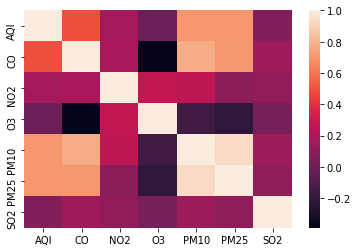

In [8]:
print(df.corr(method='pearson'))
ax=sns.heatmap(df.corr(method='pearson')) 

In [9]:
for ind in df.index:
	string=df['Date'][ind]
	string = string[:6]+"20"+string[6:]
	string = string[6:]+"-"+string[3:5]+"-"+string[0:2]
	dat=datetime.strptime(string,'%Y-%m-%d').date()
	time=datetime.strptime(df['Timestamp'][ind],'%H:%M:%S').time()
	timestamp = datetime.combine(dat,time)
	df['Date'][ind]=timestamp

print(df['Date'])
print()
type(df['Date'][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2019-10-31 21:00:00
1       2019-10-31 22:00:00
2       2019-10-31 23:00:00
3       2019-11-01 00:00:00
4       2019-11-01 01:00:00
               ...         
2782    2020-03-01 22:00:00
2783    2020-03-01 23:00:00
2784    2020-03-02 00:00:00
2785    2020-03-02 01:00:00
2786    2020-03-02 02:00:00
Name: Date, Length: 2787, dtype: object



datetime.datetime

In [0]:
mean=df['CO'].mean()
df['CO'].replace(np.nan,mean,inplace=True)

mean=df['SO2'].mean()
df['SO2'].replace(np.nan,mean,inplace=True)

mean=df['NO2'].mean()
df['NO2'].replace(np.nan,mean,inplace=True)

mean=df['O3'].mean()
df['O3'].replace(np.nan,mean,inplace=True)

mean=df['PM10'].mean()
df['PM10'].replace(np.nan,mean,inplace=True)

mean=df['PM25'].mean()
df['PM25'].replace(np.nan,mean,inplace=True)

##For NO2

In [11]:
NO2=df
print(type(NO2))

<class 'pandas.core.frame.DataFrame'>


3. Visualising Data

  1. Line Plot



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


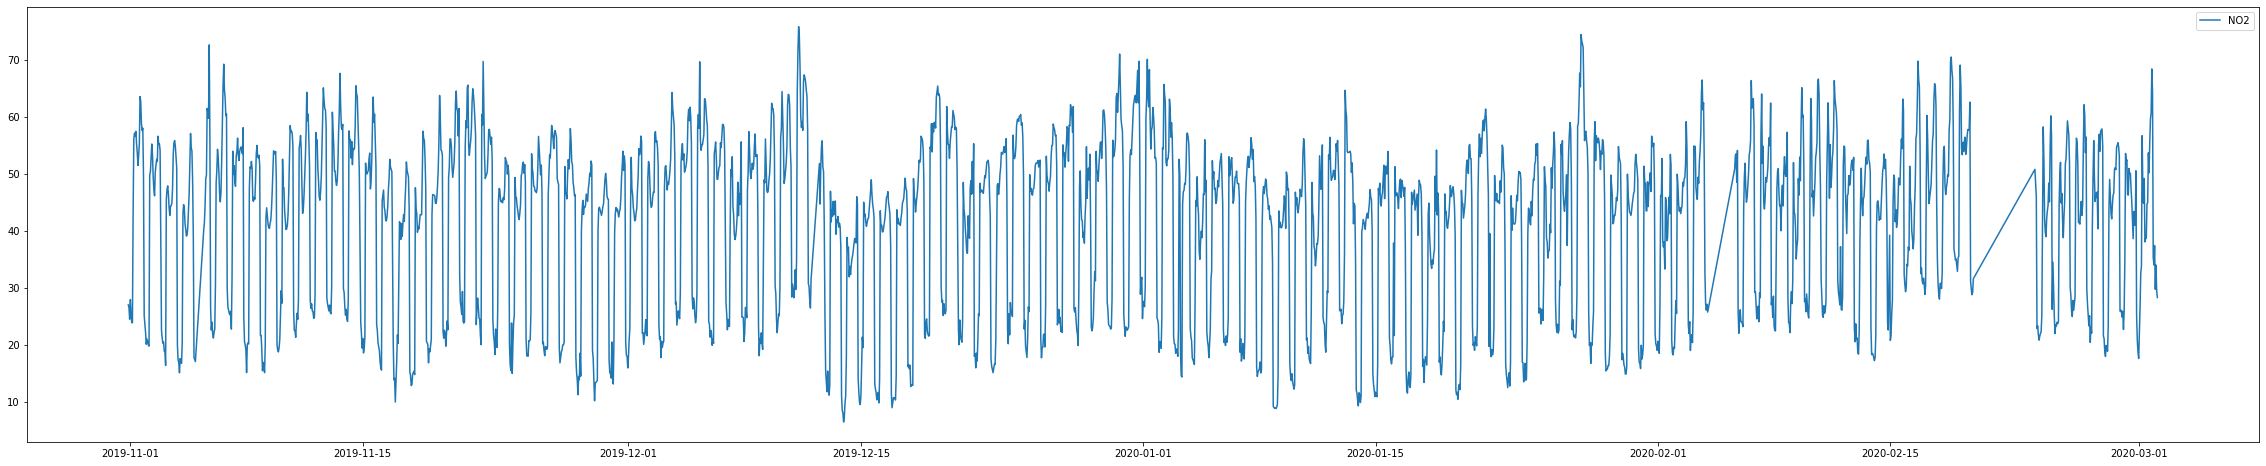

In [12]:
plt.figure(figsize=(40,8))
plt.plot(NO2['Date'],NO2['NO2'],label='NO2')
plt.legend()

2. Box Plot

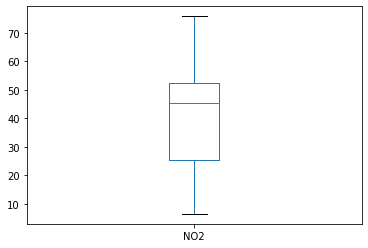

In [13]:
NO2['NO2'].plot(kind='box')

4. Dealing with Outliers

In [14]:
Q1 =  NO2['NO2'].quantile(0.25)
Q3 = NO2['NO2'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
NO2=NO2[(NO2['NO2'] >= lower) & (NO2['NO2'] <= upper)]
print(NO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2782  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2783  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2784  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2785  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2786  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2787 rows x 25

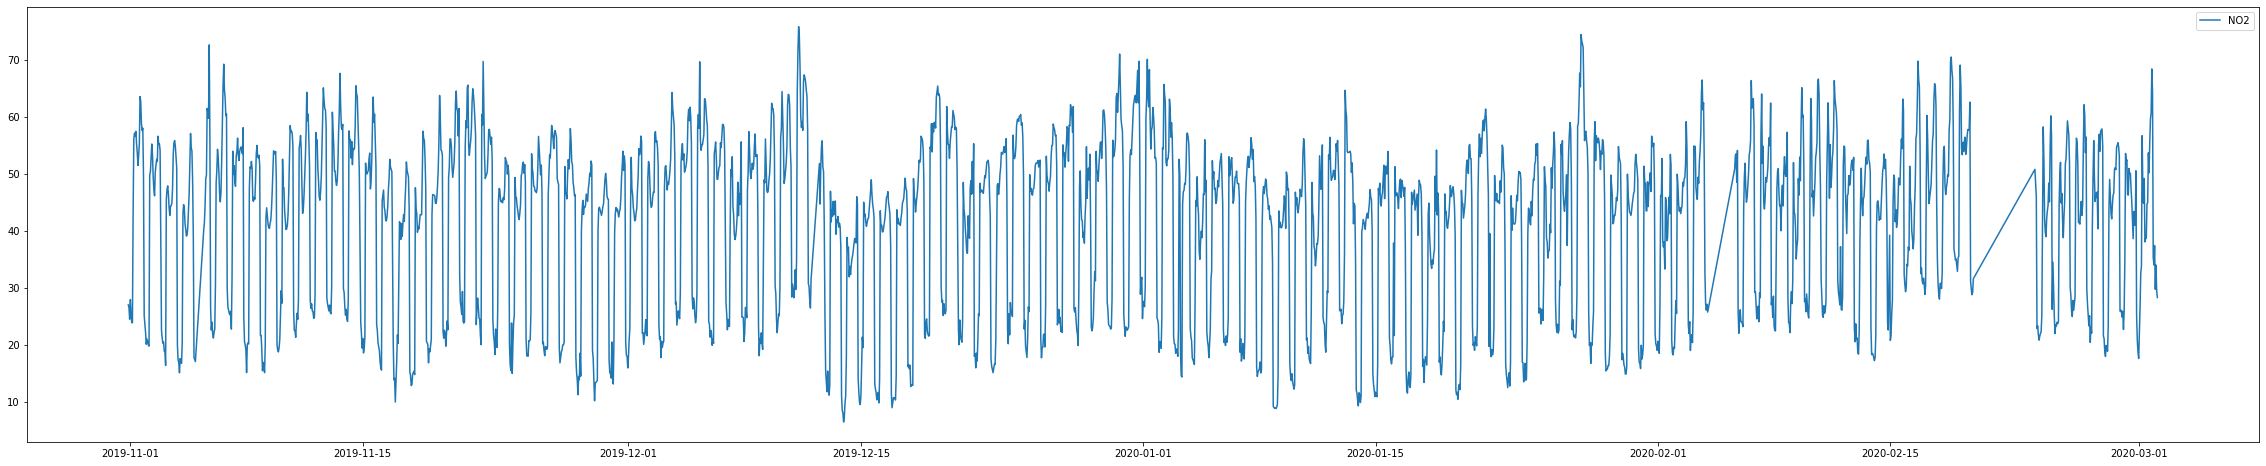

In [15]:
plt.figure(figsize=(40,8))
plt.plot(NO2['Date'],NO2['NO2'],label='NO2')
plt.legend()

In [16]:
NO2.reset_index(drop=True,inplace=True)
print(NO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2782  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2783  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2784  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2785  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2786  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2787 rows x 25

5. Train and Test Data Splitting

In [17]:
rows=NO2.shape[0]
train=NO2[0:rows-168]
test=NO2[rows-168:rows]
print(train)
print(test)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2614  2020-02-23 21:00:00  ...  The current level of air quality is likely to ...
2615  2020-02-23 22:00:00  ...  The current level of air quality is likely to ...
2616  2020-02-23 23:00:00  ...  The current level of air quality is likely to ...
2617  2020-02-24 00:00:00  ...  The current level of air quality is likely to ...
2618  2020-02-24 01:00:00  ...  The current level of air quality is likely to ...

[2619 rows x 25

##Model Fitting

In [0]:
fit=ExponentialSmoothing(train['NO2'],seasonal="additive",seasonal_periods=24).fit()

##Model Evaluation

In [0]:
yhat=fit.predict(start=rows-168,end=rows-1)

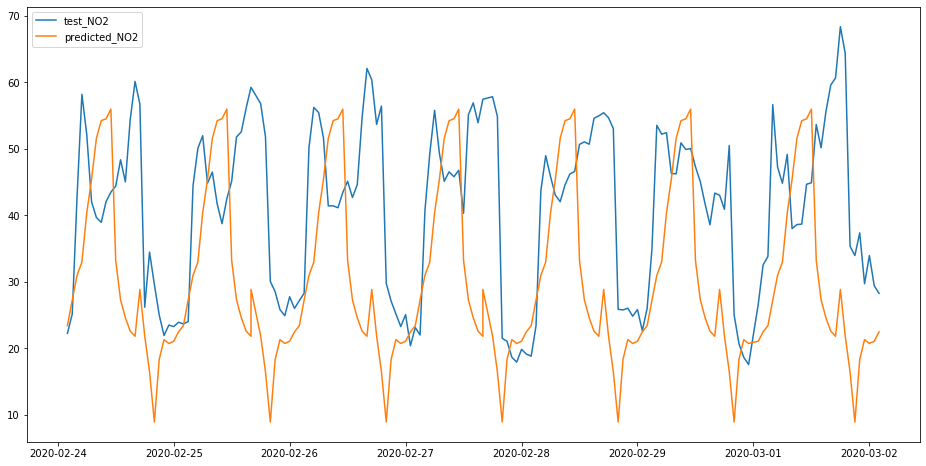

In [20]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['NO2'],label='test_NO2')
plt.plot(test['Date'],yhat,label='predicted_NO2')
plt.legend()

######MAPE Calculation

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
mean_absolute_percentage_error(test['NO2'], yhat)

33.06311972753083

##For O3

In [23]:
O3=df
print(type(O3))

<class 'pandas.core.frame.DataFrame'>


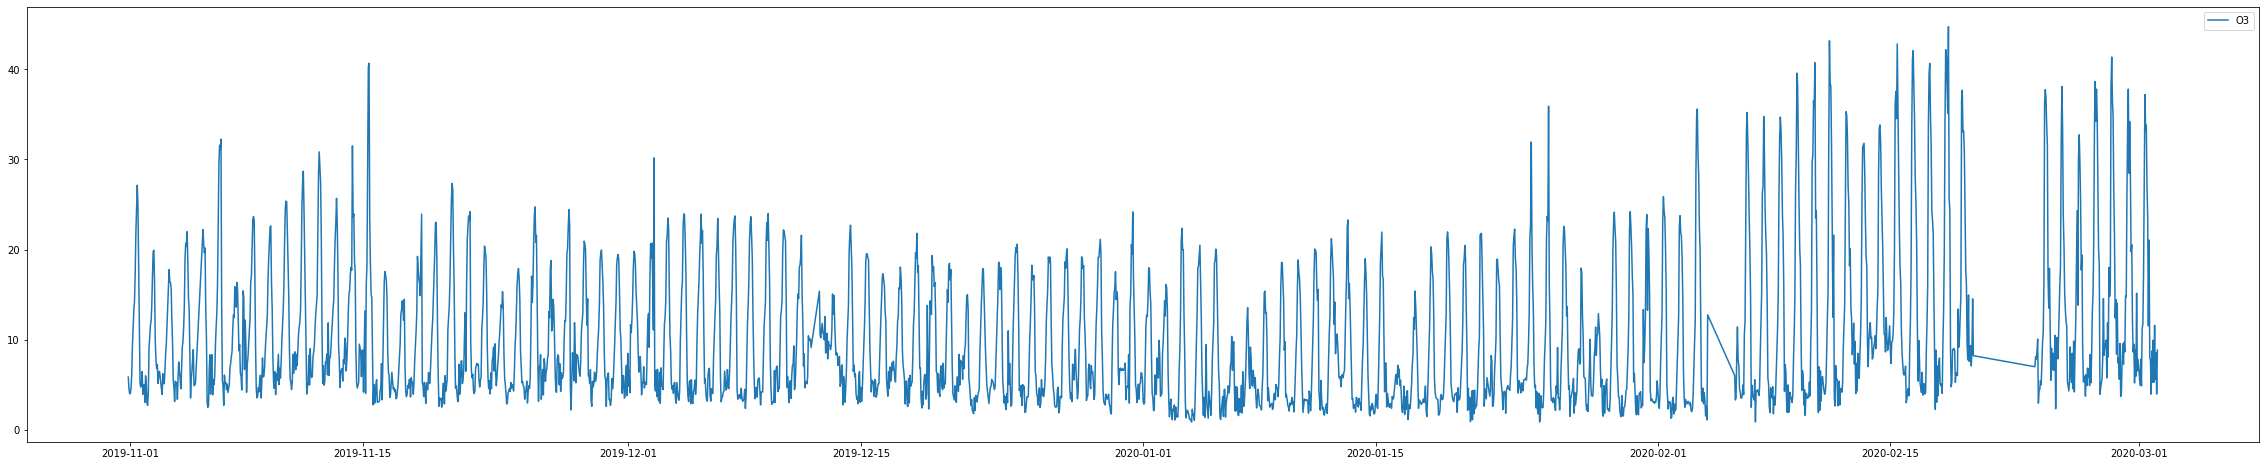

In [24]:
plt.figure(figsize=(40,8))
plt.plot(O3['Date'],O3['O3'],label='O3')
plt.legend()

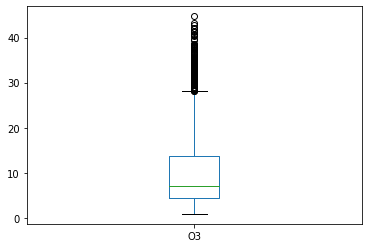

In [25]:
O3['O3'].plot(kind='box')

In [26]:
Q1 =  O3['O3'].quantile(0.25)
Q3 = O3['O3'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
O3=O3[(O3['O3'] >= lower) & (O3['O3'] <= upper)]
print(O3)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2782  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2783  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2784  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2785  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2786  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2679 rows x 25

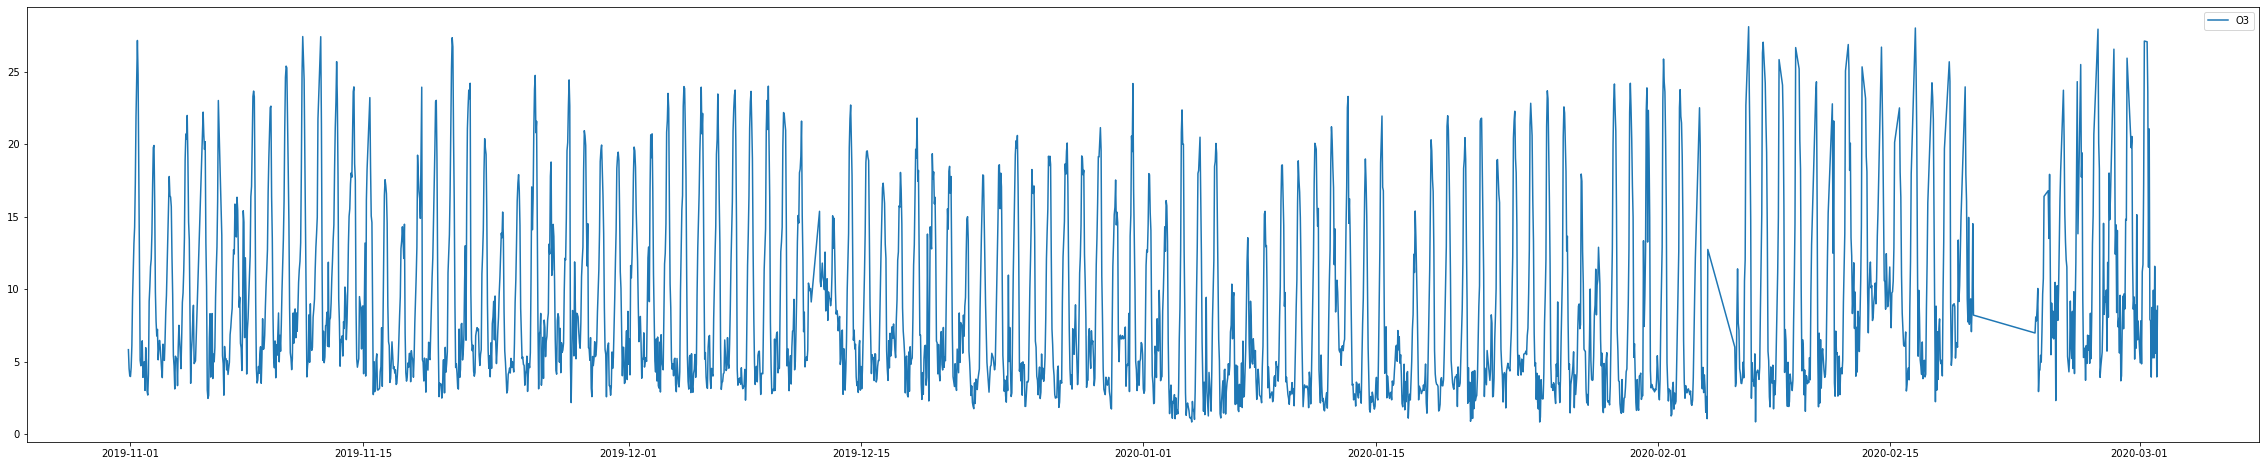

In [27]:
plt.figure(figsize=(40,8))
plt.plot(O3['Date'],O3['O3'],label='O3')
plt.legend()

In [28]:
O3.reset_index(drop=True,inplace=True)
print(O3)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2674  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2675  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2676  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2677  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2678  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2679 rows x 25

In [29]:
rows=O3.shape[0]
train=O3[0:rows-168]
test=O3[rows-168:rows]
print(train)
print(test)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2506  2020-02-18 19:00:00  ...  The current level of air quality is likely to ...
2507  2020-02-18 20:00:00  ...  The current level of air quality is likely to ...
2508  2020-02-18 21:00:00  ...  The current level of air quality is likely to ...
2509  2020-02-18 22:00:00  ...  The current level of air quality is likely to ...
2510  2020-02-18 23:00:00  ...  The current level of air quality is likely to ...

[2511 rows x 25

In [30]:
fit=ExponentialSmoothing(train['O3'],seasonal="additive",seasonal_periods=24).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
yhat=fit.predict(start=rows-168,end=rows-1)

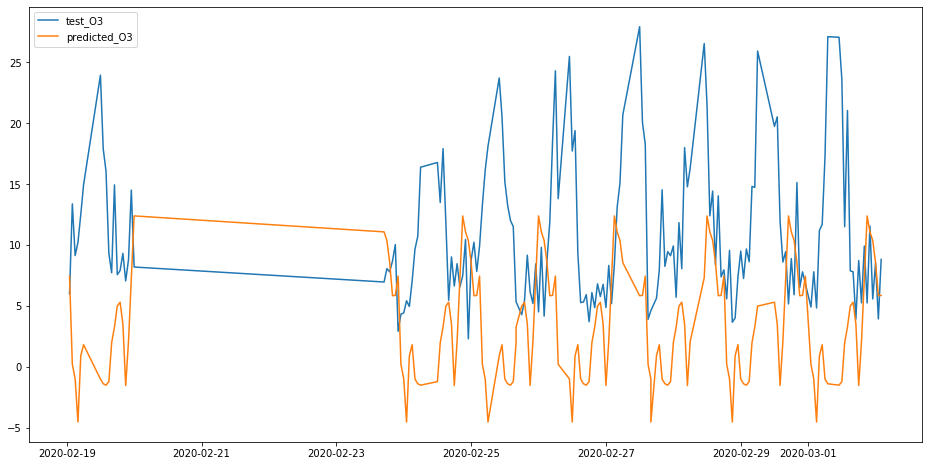

In [32]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['O3'],label='test_O3')
plt.plot(test['Date'],yhat,label='predicted_O3')
plt.legend()

In [33]:
mean_absolute_percentage_error(test['O3'], yhat)

77.66568852949453

##For SO2

In [34]:
SO2=df
print(type(SO2))

<class 'pandas.core.frame.DataFrame'>


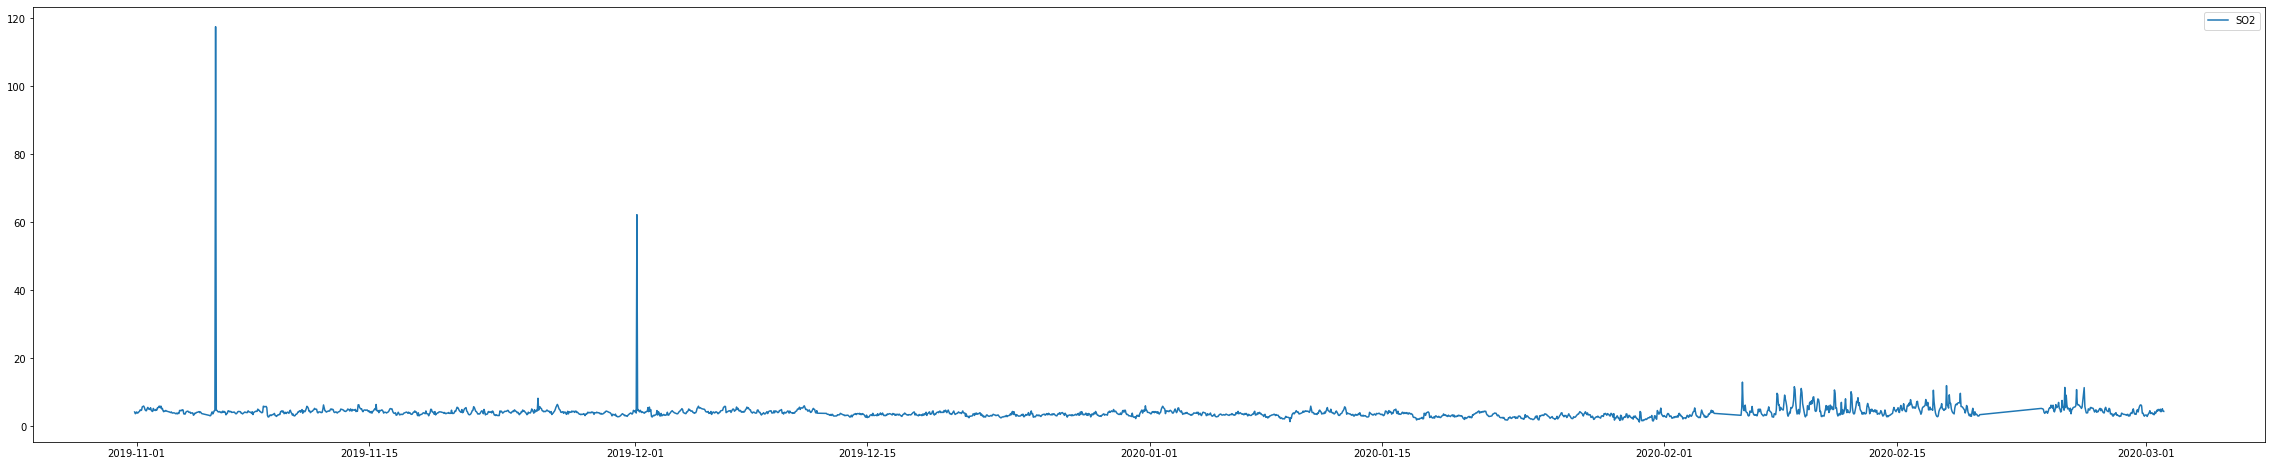

In [35]:
plt.figure(figsize=(40,8))
plt.plot(SO2['Date'],SO2['SO2'],label='SO2')
plt.legend()

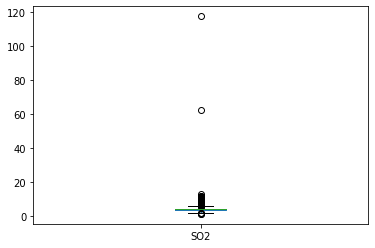

In [36]:
SO2['SO2'].plot(kind='box')

In [37]:
Q1 =  SO2['SO2'].quantile(0.25)
Q3 = SO2['SO2'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
SO2=SO2[(SO2['SO2'] >= lower) & (SO2['SO2'] <= upper)]
print(SO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2782  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2783  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2784  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2785  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2786  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2684 rows x 25

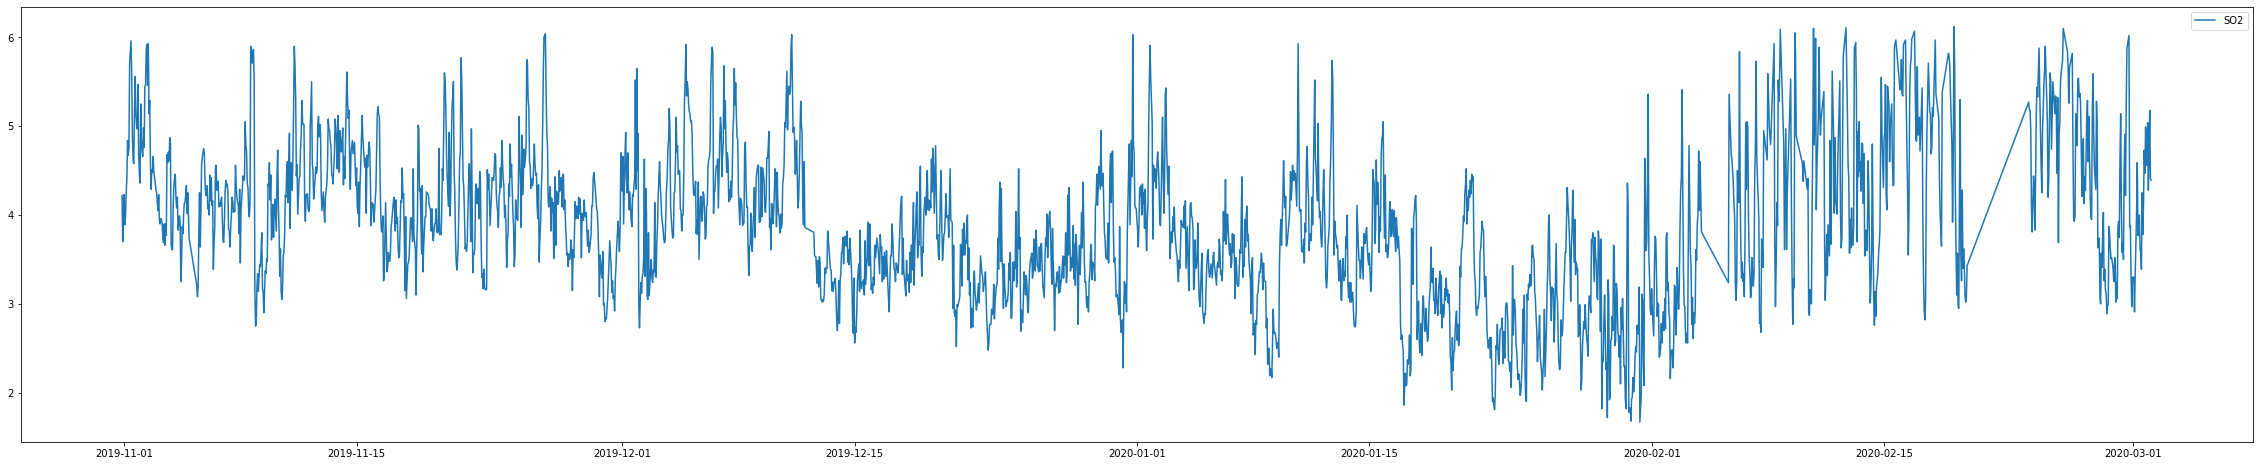

In [38]:
plt.figure(figsize=(40,8))
plt.plot(SO2['Date'],SO2['SO2'],label='SO2')
plt.legend()

In [39]:
SO2.reset_index(drop=True,inplace=True)
print(SO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2679  2020-03-01 22:00:00  ...  The current level of air quality is likely to ...
2680  2020-03-01 23:00:00  ...  The current level of air quality is likely to ...
2681  2020-03-02 00:00:00  ...  The current level of air quality is likely to ...
2682  2020-03-02 01:00:00  ...  The current level of air quality is likely to ...
2683  2020-03-02 02:00:00  ...  The current level of air quality is likely to ...

[2684 rows x 25

In [40]:
rows=SO2.shape[0]
train=SO2[0:rows-168]
test=SO2[rows-168:rows]
print(train)
print(test)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2511  2020-02-19 11:00:00  ...  The current level of air quality is likely to ...
2512  2020-02-19 12:00:00  ...  The current level of air quality is likely to ...
2513  2020-02-19 13:00:00  ...  The current level of air quality is likely to ...
2514  2020-02-19 14:00:00  ...  The current level of air quality is likely to ...
2515  2020-02-19 15:00:00  ...  The current level of air quality is likely to ...

[2516 rows x 25

In [0]:
fit=ExponentialSmoothing(train['SO2'],seasonal="additive",seasonal_periods=24).fit()

In [0]:
yhat=fit.predict(start=rows-168,end=rows-1)

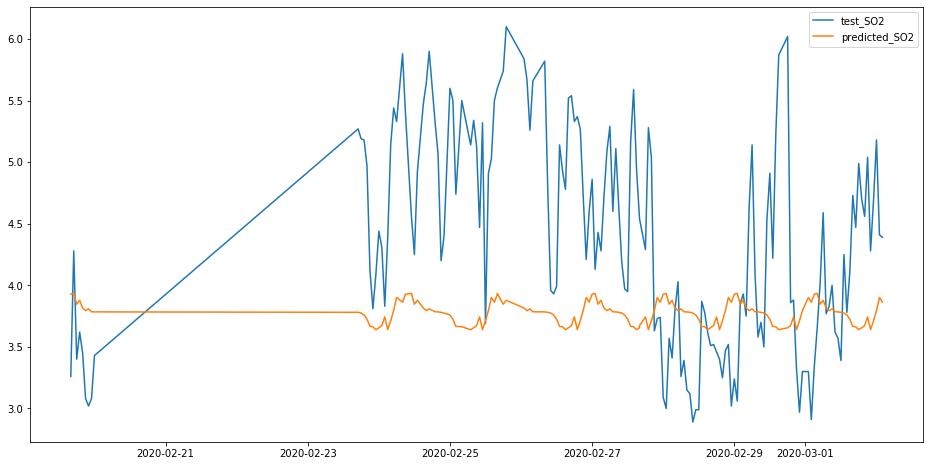

In [43]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['SO2'],label='test_SO2')
plt.plot(test['Date'],yhat,label='predicted_SO2')
plt.legend()

In [44]:
mean_absolute_percentage_error(test['SO2'], yhat)

18.387584212532072